In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2* np.random.rand(100, 5)
y = (4 + 3 * X[:,0]+4*X[:,1] - X[:,2] +5* X[:,3] - 1* X[:,4]) #+ np.random.randn(100, 1)
         #[ 2.99293546  3.69444965 -0.91713935  5.02710236 -1.23295015]]
          [ 3.40558164  3.87774868 -1.27050311  5.23809334 -0.81228679] 
#y =4 +3x
#plt.plot(X,y, "b.")
#plt.show()

In [ ]:
y.shape

(100, 1)

In [ ]:
y = y.reshape(100,1) + np.random.randn(100, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)


[4.05302542] [[ 3.27883082  3.7845339  -1.4036295   5.1490756  -0.88562156]]


In [ ]:
X_new = np.array([[0], [2], [5],[-1]])


In [ ]:
y_pred = lin_reg.predict(X_new)

In [ ]:
y_pred

array([[ 3.99260053],
       [ 9.75348739],
       [18.39481767],
       [ 1.1121571 ]])

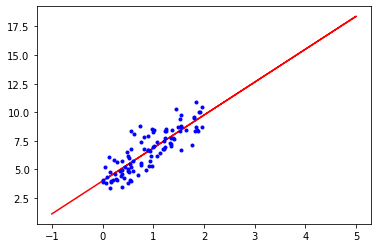

In [ ]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter = 100000, tol = 1e-4, penalty = None, eta0 = 0.05)
sgd_regressor.fit(X, y.ravel())

SGDRegressor(eta0=0.05, max_iter=100000, penalty=None, tol=0.0001)

In [ ]:
print(sgd_regressor.intercept_, sgd_regressor.coef_)

[3.53582606] [ 3.40558164  3.87774868 -1.27050311  5.23809334 -0.81228679]


In [ ]:
y_pred_A = lin_reg.predict(X_new)
y_pred_B = sgd_regressor.predict(X_new)

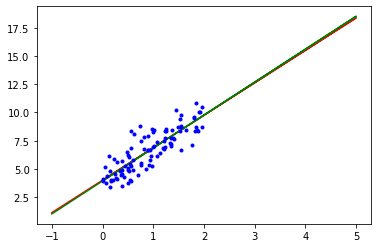

In [ ]:
plt.plot(X_new, y_pred_A, "r-")
plt.plot(X_new, y_pred_B, "g-")
plt.plot(X, y, "b.")
plt.show()

полиномиальная регрессия

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)


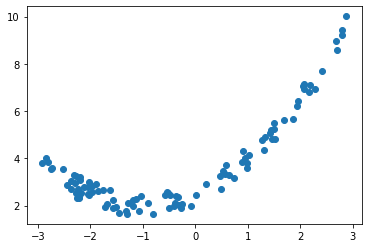

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_poly = polynomial_features.fit_transform(X)

In [ ]:
X[0]

array([-2.74925737])

In [ ]:
X_poly[0]

array([-2.74925737,  7.55841609])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.49886033] [[0.99420921 0.51023079]]


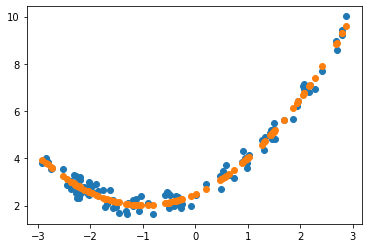

In [ ]:
plt.scatter(X, y)
y_pred = lin_reg.predict(X_poly)
plt.scatter(X, y_pred)
plt.show()

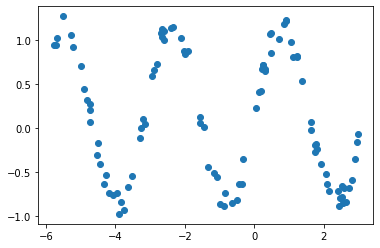

In [ ]:
m = 100
X = 9 * np.random.rand(m, 1) - 6
y = np.sin(2*X) + 0.3*np.random.rand(m, 1)

plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline(
    
    [("poly_features", PolynomialFeatures(degree=10, include_bias = False)), 
     ("lin_reg", LinearRegression()),])

polynomial_regression.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('lin_reg', LinearRegression())])

In [ ]:
y_pred = polynomial_regression.predict(X)

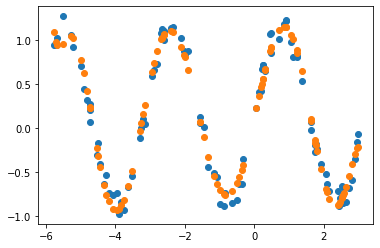

In [ ]:
plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

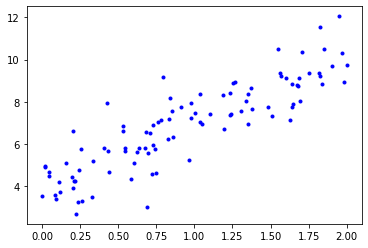

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X,y, "b.")
plt.show()


from sklearn.linear_model import Ridge


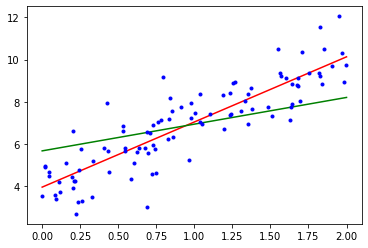

In [ ]:
X_new = np.array([[0], [2]])
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X_new)

ridge_reg = Ridge(alpha=50)
ridge_reg.fit(X, y)

y_pred_B = ridge_reg.predict(X_new)

plt.plot(X_new, y_pred, "r-")
plt.plot(X_new, y_pred_B, "g-")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
sgd_regressor = SGDRegressor(alpha = 50, penalty = "l2")
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=50)

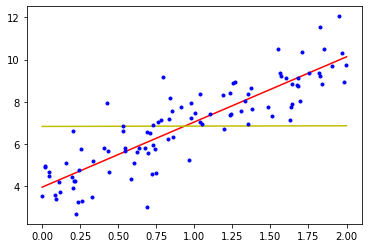

In [ ]:
X_new = np.array([[0], [2]])
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X_new)

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)

y_pred_B = ridge_reg.predict(X_new)

y_pred_C = sgd_regressor.predict(X_new)

plt.plot(X_new, y_pred, "r-")
#plt.plot(X_new, y_pred_B, "g-")
plt.plot(X_new, y_pred_C,'y-')
plt.plot(X, y, "b.")
plt.show()